<a href="https://colab.research.google.com/github/Priya-4233/AICTE_Internship-Projects/blob/main/MovieReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Kaggle**

This cell executes a shell command to install the Kaggle library using pip. This is a prerequisite for accessing datasets hosted on the Kaggle platform directly from the notebook environment.

In [ ]:
! pip install kaggle

**Kaggle Credentials Setup**

This cell performs a series of shell commands to configure the Kaggle API with the user's credentials. It creates a directory for Kaggle configuration files, copies the kaggle.json file (which should contain the API key) into this directory, and sets the appropriate file permissions to ensure secure access to the credentials.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Download Dataset**

This cell utilizes the Kaggle API to download the specified dataset, "imdb-dataset-of-50k-movie-reviews," from the Kaggle platform. The -d flag indicates that a dataset is being downloaded.

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


**Unzip Dataset**

This cell extracts the contents of the downloaded zip file, which is expected to contain the primary dataset file, IMDB Dataset.csv.

In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


**Import Libraries and Download NLTK Data**

This cell imports essential Python libraries required for data manipulation, visualization, and natural language processing. It also downloads the 'stopwords' corpus from the Natural Language Toolkit (NLTK) library, which is crucial for text preprocessing.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Load Data**

This cell loads the IMDB Dataset.csv file into a pandas DataFrame named data. This DataFrame will be the primary structure for storing and manipulating the movie review data.

In [ ]:
data=pd.read_csv('IMDB Dataset.csv')

**Display Head of DataFrame**

This cell displays the first few rows of the data DataFrame. This provides a quick overview of the data structure, column names, and initial data points.

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**Sentiment Distribution**

This cell calculates and displays the value counts for the 'sentiment' column. This helps in understanding the distribution of positive and negative reviews within the dataset, which is important for assessing dataset balance.

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


**Handle Missing Values**

This cell removes any rows from the DataFrame that contain missing values using the dropna() method with inplace=True to modify the DataFrame directly. While this dataset is clean, this is a standard preprocessing step.

In [ ]:
data.dropna(inplace=True)

**Display DataFrame After Handling Missing Values**

This cell displays the entire DataFrame again after the missing value handling step to confirm the changes (though none were expected in this specific dataset).

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**Initial clean_review Function (Less Optimized)**

This cell defines an initial function to clean review text by removing stopwords. This version is less optimized as it does not handle punctuation or lowercase conversion effectively. It serves as a precursor to the more refined cleaning function.

In [ ]:
def clean_review(review):
  str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

**Optimized clean_review_optimized Function and Application**

This cell defines an optimized function for cleaning the review text. It converts text to lowercase, removes punctuation using regular expressions, and efficiently removes stopwords by using a set for faster lookups. The function is then applied to the 'review' column of the DataFrame, replacing the original reviews with the cleaned versions. The head of the DataFrame is printed to show the result of the cleaning.

In [ ]:
from nltk.corpus import stopwords
import re # Import the regular expression module

# Make the stopwords a set for faster lookups
stop_words_set = set(stopwords.words('english'))

def clean_review_optimized(review):
    # Convert to lowercase and remove punctuation
    review = re.sub(r'[^\w\s]', '', review.lower())
    # Split into words and filter out stopwords
    return ' '.join(word for word in review.split() if word not in stop_words_set)

# Apply the optimized function
data['review'] = data['review'].apply(clean_review_optimized)

print(data.head())

                                              review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically theres family little boy jake thinks...  negative
4  petter matteis love time money visually stunni...  positive


**Import WordCloud**

This cell imports the WordCloud class from the wordcloud library, which is necessary for generating word cloud visualizations.

In [ ]:
from wordcloud import WordCloud

**Generate and Display Word Cloud for Negative Reviews**

This cell generates a word cloud visualization specifically for negative movie reviews. It concatenates all negative reviews into a single string, creates a WordCloud object with specified dimensions, generates the word cloud image, and displays it using matplotlib.

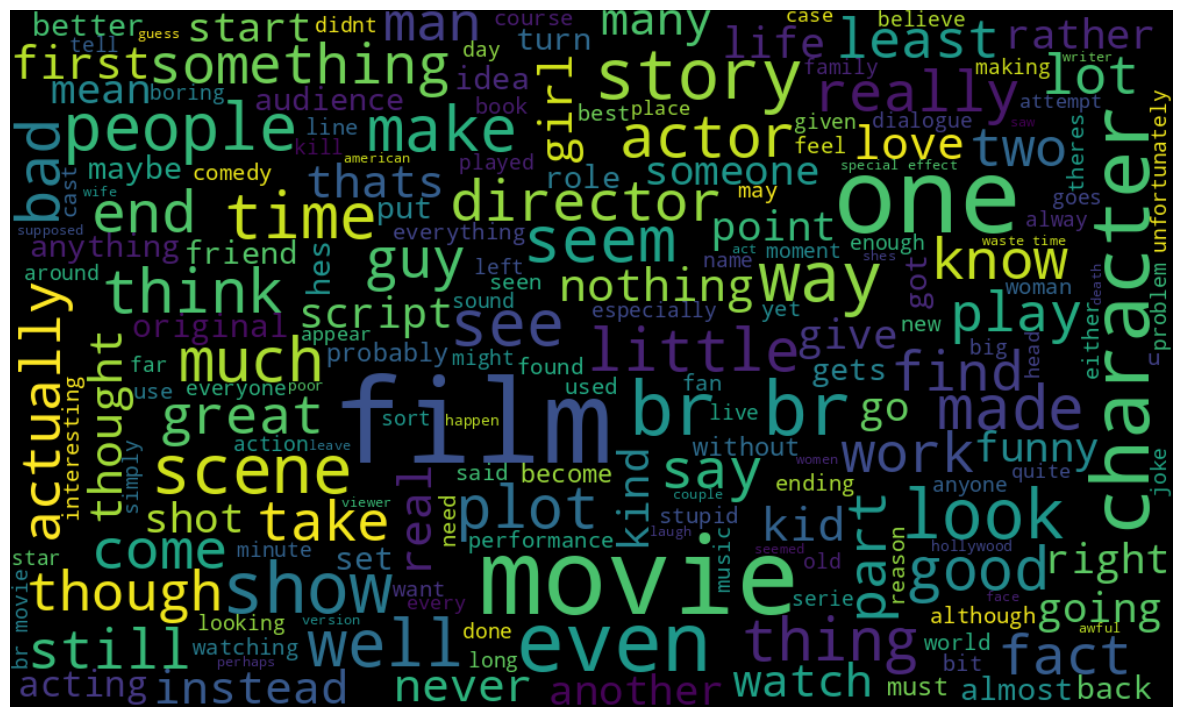

In [ ]:
reviews=' '.join(word for word in data['review'][data['sentiment']=='negative'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

**Generate and Display Word Cloud for Positive Reviews**

Similar to the previous cell, this cell generates and displays a word cloud visualization for positive movie reviews, providing a visual representation of the most frequent words in positive sentiment.

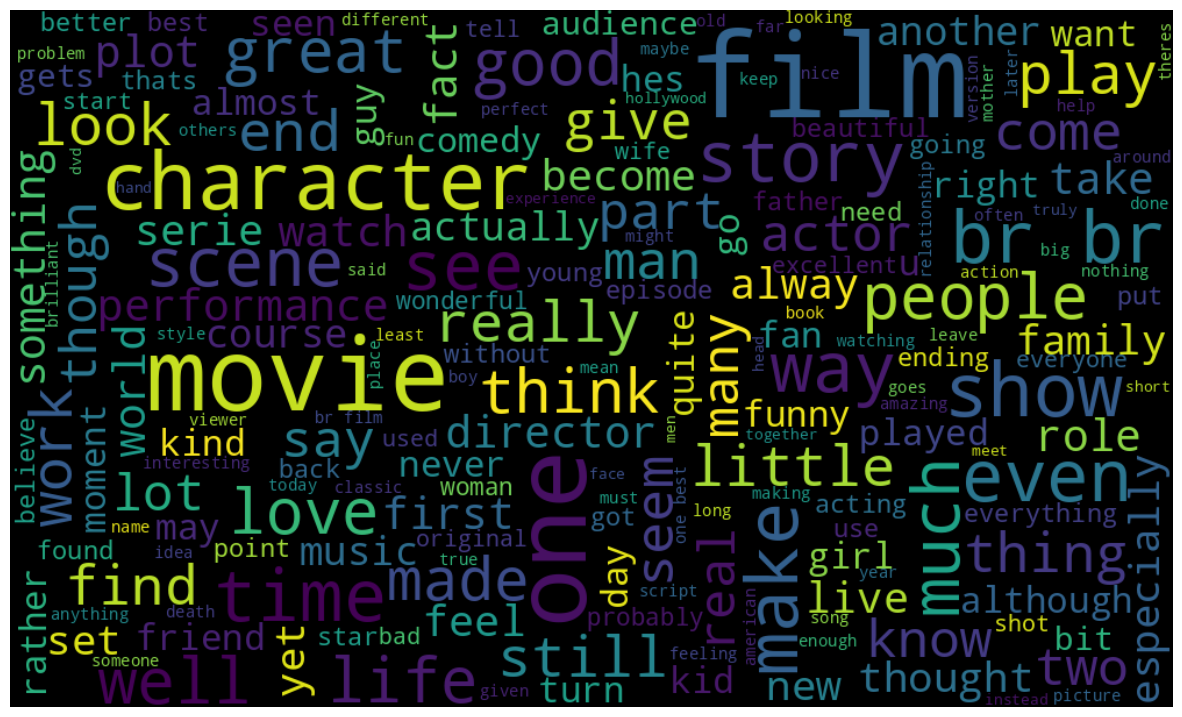

In [ ]:
reviews=' '.join(word for word in data['review'][data['sentiment']=='positive'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

**Initialize TF-IDF Vectorizer**

This cell initializes a TfidfVectorizer object from scikit-learn. TF-IDF is a technique used to convert text data into numerical feature vectors. max_features=2500 limits the vocabulary size to the top 2500 most frequent terms based on TF-IDF scores.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

**Encode Sentiment Labels**

This cell replaces the string labels 'positive' and 'negative' in the 'sentiment' column with numerical values 1 and 0, respectively. This is a necessary step as machine learning models typically require numerical input for the target variable.

In [ ]:
data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])

/tmp/ipython-input-53-3724057555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])


**Display Sentiment Distribution After Encoding**

This cell displays the value counts for the 'sentiment' column again after the encoding step to confirm that the labels have been successfully converted to numerical values.

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


**Import Logistic Regression Model**

This cell imports the LogisticRegression class from scikit-learn, which will be used as the classification model for sentiment analysis.

In [ ]:
from sklearn.linear_model import LogisticRegression

**Initialize Logistic Regression Model**

This cell initializes an instance of the LogisticRegression model.

In [ ]:
model = LogisticRegression()

**Import train_test_split**

This cell imports the train_test_split function from scikit-learn, which is used to divide the dataset into training and testing subsets.

In [ ]:
from sklearn.model_selection import train_test_split

**Split Data into Training and Testing Sets**

This cell splits the 'review' and 'sentiment' data into training and testing sets. 80% of the data is allocated for training, and 20% for testing, as specified by test_size=0.2. random_state=42 ensures reproducibility of the split.

In [ ]:
reviews_train, reviews_test, sentiment_train, sentiment_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

**Fit and Transform Training Data, Testing Data with TF-IDF**

This cell applies the TF-IDF vectorization. fit_transform() is used on the training data to learn the vocabulary and transform the training reviews into TF-IDF vectors. transform() is used on the testing data to apply the same learned vocabulary and transformation without introducing data leakage from the test set.

In [ ]:
reviews_train_cv = cv.fit_transform(reviews_train)
reviews_test_cv = cv.transform(reviews_test)

**Fit Logistic Regression Model**

This cell trains the logistic regression model using the TF-IDF transformed training reviews (reviews_train_cv) and their corresponding sentiment labels (sentiment_train).

In [ ]:
model.fit(reviews_train_cv, sentiment_train)

LogisticRegression()

**Make Predictions on Test Data**

This cell uses the trained logistic regression model to make sentiment predictions on the TF-IDF transformed testing reviews (reviews_test_cv).

In [ ]:
predict = model.predict(reviews_test_cv)

**Generate and Display Confusion Matrix**

This cell calculates and displays a confusion matrix to evaluate the performance of the trained model on the test set. The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions, providing insights into the model's accuracy and types of errors.

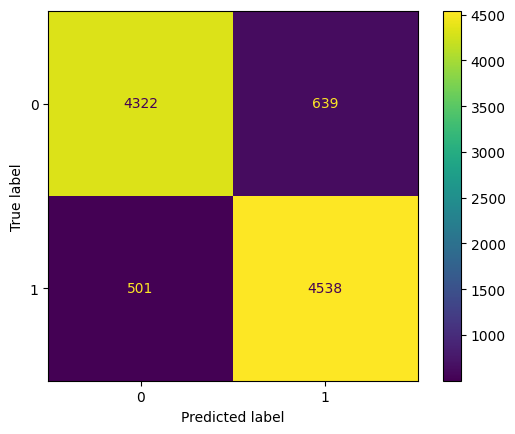

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sentiment_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

**Import Pickle Library**

This cell imports the pickle library, which is used for serializing and deserializing Python objects. This is necessary for saving and loading the trained model and vectorizer.

In [ ]:
import pickle as pk

**Save Trained Model**

This cell saves the trained logistic regression model to a file named model.pkl using the pickle library. This allows the model to be reused later without retraining.

In [ ]:
pk.dump(model,open('model.pkl','wb'))

**Save Trained TF-IDF Vectorizer**

This cell saves the trained TF-IDF vectorizer to a file named vectorizer.pkl using the pickle library. Saving the vectorizer is crucial as the same vectorization must be applied to any new data before making predictions with the saved model.

In [ ]:
pk.dump(cv, open('vectorizer.pkl', 'wb'))

**Load Model and Vectorizer and Make Predictions on Example Data**

This cell demonstrates how to load the saved model and vectorizer from their respective pickle files. It then defines example new reviews, applies the same cleaning and TF-IDF transformation steps used during training, and uses the loaded model to predict the sentiment of these new reviews. The predicted sentiments are then interpreted and printed.

In [ ]:
import pickle as pk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# Import other necessary libraries for cleaning/preprocessing if applicable
import re
from nltk.corpus import stopwords

# Assuming the files are in the same directory as your script
model_file_path = 'model.pkl'
vectorizer_file_path = 'vectorizer.pkl'

try:
    # Load the model
    with open(model_file_path, 'rb') as f:
        loaded_model = pk.load(f)
    print("Model loaded successfully.")

    # Load the vectorizer
    with open(vectorizer_file_path, 'rb') as f:
        loaded_vectorizer = pk.load(f)
    print("Vectorizer loaded successfully.")

    # Now you can use both to preprocess new data and make predictions

    # Example of processing new data and making a prediction
    new_reviews = ["This movie was absolutely amazing!", "It was a terrible film."]

    # Apply the same cleaning steps as in your training code
    stop_words_set = set(stopwords.words('english'))

    def clean_review_for_prediction(review):
        review = re.sub(r'[^\w\s]', '', review.lower())
        return ' '.join(word for word in review.split() if word not in stop_words_set)

    cleaned_new_reviews = [clean_review_for_prediction(review) for review in new_reviews]

    # Transform the cleaned new reviews using the loaded vectorizer
    new_reviews_transformed = loaded_vectorizer.transform(cleaned_new_reviews)

    # Make predictions using the loaded model
    predictions = loaded_model.predict(new_reviews_transformed)

    # Interpret the predictions (0 for negative, 1 for positive)
    sentiment_mapping = {0: 'negative', 1: 'positive'}
    predicted_sentiments = [sentiment_mapping[pred] for pred in predictions]

    print("New reviews:", new_reviews)
    print("Predicted sentiments:", predicted_sentiments)

except FileNotFoundError:
    print("Error: One or both of the pickle files were not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Model loaded successfully.
Vectorizer loaded successfully.
New reviews: ['This movie was absolutely amazing!', 'It was a terrible film.']
Predicted sentiments: ['positive', 'negative']


**Load Model and Vectorizer (Simplified)**

This cell provides a simplified way to load the trained model and vectorizer, assuming the files are located in the /content/ directory.

In [ ]:
model = pk.load(open('/content/model.pkl', 'rb'))
vectorizer = pk.load(open('/content/vectorizer.pkl', 'rb'))

**Get User Input and Predict Sentiment**

This cell demonstrates how to integrate the loaded model and vectorizer into an interactive application. It prompts the user to enter a movie review, cleans and transforms the input using the loaded vectorizer, makes a sentiment prediction using the loaded model, and prints the predicted sentiment in a user-friendly format.

In [ ]:
import pickle as pk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords

# Assume your model and vectorizer are already loaded
# For example, from your previous cells:
# model = pk.load(open('/content/model.pkl', 'rb'))
# vectorizer = pk.load(open('/content/vectorizer.pkl', 'rb')) # Assuming this is the correct name for your vectorizer

# Define the cleaning function (should be the same as the one used during training)
stop_words_set = set(stopwords.words('english'))

def clean_review_for_prediction(review):
    review = re.sub(r'[^\w\s]', '', review.lower())
    return ' '.join(word for word in review.split() if word not in stop_words_set)

# Get a new review from the user
new_review = input("Enter a movie review: ")

# Clean the new review
cleaned_new_review = clean_review_for_prediction(new_review)

# Transform the cleaned new review using the loaded vectorizer
# The vectorizer expects a list of documents, so we pass the single review in a list
new_review_transformed = vectorizer.transform([cleaned_new_review])

# Make a prediction using the loaded model
prediction = model.predict(new_review_transformed)

# Interpret the prediction
sentiment_mapping = {0: 'NEGATIVE REVIEW', 1: 'POSITIVE REVIEW'}
predicted_sentiment = sentiment_mapping[prediction[0]] # prediction is an array, so access the first element

# Print the result
print(f"The review is predicted to be: {predicted_sentiment}")

Enter a movie review: It's a rare film 
The review is predicted to be: POSITIVE REVIEW
